# Kennisnetwerk Data Science: image recognition
## Team 6: land en water

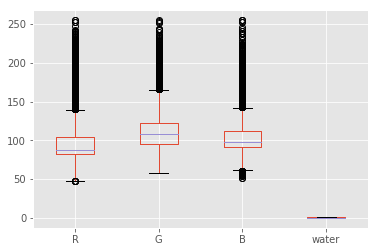

In [125]:
from PIL import Image
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline


def img2df(path):
    ''' read an image into a dataframe '''
    img = Image.open(path)
    arr = np.array(img.getdata())
    df = pd.DataFrame(arr)
    return df


coords = '163600.0_563400.0'

# read image
img = img2df('./%s.tif' % coords)
img.columns = ['R', 'G', 'B']

# read label and mark water
lbl = img2df('./WaterVlakkenRasterUitBGT_%s.tif' % coords)
lbl['water'] = lbl[0] == 0  # black pixels are water
del lbl[0]

# join image and label
df = img.join(lbl)
width, height = Image.open('./%s.tif' % coords).size
size = width * height
df['x'] = [i % 1000 for i in range(size)]
df['y'] = [i // 1000 for i in range(size)]
df.set_index(['x', 'y'], inplace=True)
df.boxplot()

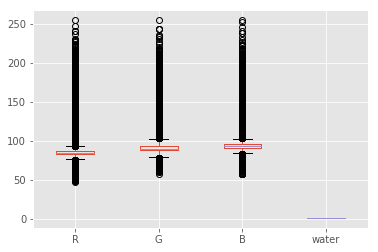

In [126]:
water = df[df['water']]
water.boxplot()

In [127]:
water.describe()

,R,G,B
count,265301.000000,265301.000000,265301.000000
mean,90.345264,95.771226,97.253795
std,17.568074,15.862048,13.690633
min,47.000000,58.000000,57.000000
25%,83.000000,88.000000,91.000000
50%,85.000000,90.000000,93.000000
75%,87.000000,94.000000,96.000000
max,255.000000,255.000000,255.000000


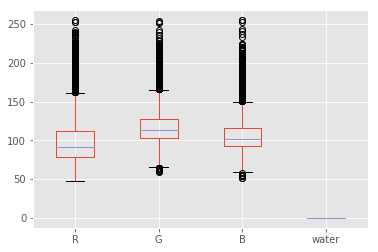

In [128]:
land = df[~df['water']]
land.boxplot()

In [129]:
land.describe()

,R,G,B
count,734699.000000,734699.000000,734699.000000
mean,101.349192,119.002121,108.819552
std,30.830906,21.653088,22.818372
min,47.000000,59.000000,51.000000
25%,79.000000,103.000000,93.000000
50%,91.000000,113.000000,102.000000
75%,112.000000,128.000000,116.000000
max,255.000000,254.000000,255.000000


In [130]:
water_ref = len(water)

query = 'G < 94'  # R and G don seem to matter much
water_label = df.query(query)
false_positives = len(water_label.query('water == False'))
water_label = len(water_label)

land_label = df.query('~(%s)' % query)
false_negatives = len(land_label.query('water == True'))
land_label = len(land_label)

data_set = len(df)
print('Data set:        %7d' % data_set)
print('Water:           %7d (%2.2f%%)' % (water_ref, water_ref/data_set))
print('Land labels:     %7d' % land_label)
print('Water labels:    %7d (%2.2f%%)' % (water_label, water_label/data_set))
print('False positives: %7d (%2.2f%%)' % (false_positives, 100*false_positives/water_label))
print('False negatives: %7d (%2.2f%%)' % (false_negatives, 100*false_negatives/land_label))

Data set:        1000000
Water:            265301 (0.27%)
Land labels:      773408
Water labels:     226592 (0.23%)
False positives:   29132 (12.86%)
False negatives:   67841 (8.77%)


In [161]:
img['BW'] = 255
img.loc[img['G'] < 94, 'BW'] = 0

pixels = img['BW'].values
mask = Image.open('./WaterVlakkenRasterUitBGT_%s.tif' % coords)  # init image
mask.putdata(pixels)  # overwrite
mask.show()

In [160]:
img['R'] = img['BW'].values

mask = Image.open('./WaterVlakkenRasterUitBGT_%s.tif' % coords)  # init image
img['B'] = np.array(mask.getdata())

layers = Image.open('./%s.tif' % coords)
pixels = [(r, g, b) for r, g, b  in img[['R', 'G', 'B']].values.tolist()]
layers.putdata(pixels)  # overwrite
layers.show()